- (c) Ken-ichi Fukui, 2021/02/25
- MIT License

## Kerasを用いたMINISTデータの識別
- 要TensorFlow
 - Keras: https://keras.io/ja/

In [9]:
%matplotlib inline
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os, struct
import numpy as np

### MNISTデータの読み込み関数

In [10]:
def load_mnist(path, kind='train'):

    labels_path = os.path.join(path,'%s-labels.idx1-ubyte'% kind)
    images_path = os.path.join(path,'%s-images.idx3-ubyte'% kind)
   
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',lbpath.read(8))
        labels = np.fromfile(lbpath,dtype=np.uint8)
    
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII",imgpath.read(16))
        images = np.fromfile(imgpath,dtype=np.uint8).reshape(len(labels), 784)
        
    return images, labels

### MNISTデータの読み込み

In [11]:
current_path = os.path.dirname(os.path.realpath('__file__'))
X_train, y_train = load_mnist(current_path, kind='train')
X_test, y_test = load_mnist(current_path, kind='t10k')

In [12]:
# 学習データとテストデータは最初のn_train_data, n_test_data個用いる
n_training_data = 1000
n_test_data = 1000

X_trn = X_train[:n_training_data][:]
y_trn = y_train[:n_training_data]
X_tst = X_test[:n_test_data][:]
y_tst = y_test[:n_test_data]

# 値の範囲を[0,1]に変換 (Keras用)
X_trn = X_trn.astype('float32')/255
X_tst = X_tst.astype('float32')/255

# One-hot encoderによりクラスラベルをバイナリに変換 (Keras用)
# 例：1 -> [1,0,...,0], 2 -> [0,1,0,...]
y_trn = to_categorical(y_trn)
y_tst = to_categorical(y_tst)

# 入力データの次元数(=784画素)を取得
n_dim = X_trn.shape[1]

# 出力クラス数(=10クラス)
n_out = y_trn.shape[1]

### 学習履歴をプロットする関数

In [13]:
# Accuracyの履歴のプロット
def plot_history_acc(rec):
    plt.plot(rec.history['accuracy'],"o-",label="train")
    plt.plot(rec.history['val_accuracy'],"o-",label="test")
    plt.title('accuracy history')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
    plt.show()
    
# 損失関数値の履歴のプロット
def plot_history_loss(rec):
    plt.plot(rec.history['loss'],"o-",label="train",)
    plt.plot(rec.history['val_loss'],"o-",label="test")
    plt.title('loss history')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend(loc='upper right')
    plt.show()

### AutoEncoderの構築
- Relu（活性化関数）: f(x) = max(0,x)

In [14]:
ae = Sequential()
ae.add(Dense(500, input_dim = n_dim, activation='relu'))
ae.add(Dropout(0.2))
ae.add(Dense(250, activation='relu'))
ae.add(Dropout(0.5))
ae.add(Dense(125, activation='relu', name = 'encoder'))
ae.add(Dropout(0.5))
ae.add(Dense(250, activation='relu'))
ae.add(Dropout(0.5))
ae.add(Dense(500, activation='relu'))
ae.add(Dropout(0.5))
ae.add(Dense(n_dim, activation='relu'))

# 損失関数にMean Squared Error（平均二乗誤差），　パラメータの最適化にAdamを設定
# Adam(Adaptive moment estimation)は確率的最急降下法の一種． 
ae.compile(loss = 'mse', optimizer ='adam')

# Kerasもfit()で学習を行う． ただし戻り値として学習履歴を返す．
records_ae = ae.fit(X_trn, X_trn,
                    epochs=250,
                    batch_size=200,
                    shuffle=True,
                    validation_data=(X_tst, X_tst))

Epoch 1/250
5/5 [==============================] - 1s 50ms/step - loss: 0.1023 - val_loss: 0.0882
Epoch 2/250
5/5 [==============================] - 0s 26ms/step - loss: 0.0816 - val_loss: 0.0878
Epoch 3/250
5/5 [==============================] - 0s 23ms/step - loss: 0.0734 - val_loss: 0.0813
Epoch 4/250
5/5 [==============================] - 0s 20ms/step - loss: 0.0704 - val_loss: 0.0822
Epoch 5/250
5/5 [==============================] - 0s 20ms/step - loss: 0.0684 - val_loss: 0.0802
Epoch 6/250
5/5 [==============================] - 0s 20ms/step - loss: 0.0675 - val_loss: 0.0766
Epoch 7/250
5/5 [==============================] - 0s 20ms/step - loss: 0.0669 - val_loss: 0.0751
Epoch 8/250
5/5 [==============================] - 0s 20ms/step - loss: 0.0661 - val_loss: 0.0734
Epoch 9/250
5/5 [==============================] - 0s 20ms/step - loss: 0.0654 - val_loss: 0.0716
Epoch 10/250
5/5 [==============================] - 0s 20ms/step - loss: 0.0657 - val_loss: 0.0709
Epoch 11/250
5/5 [=

Epoch 84/250
5/5 [==============================] - 0s 19ms/step - loss: 0.0421 - val_loss: 0.0426
Epoch 85/250
5/5 [==============================] - 0s 19ms/step - loss: 0.0427 - val_loss: 0.0428
Epoch 86/250
5/5 [==============================] - 0s 19ms/step - loss: 0.0418 - val_loss: 0.0418
Epoch 87/250
5/5 [==============================] - 0s 20ms/step - loss: 0.0413 - val_loss: 0.0418
Epoch 88/250
5/5 [==============================] - 0s 19ms/step - loss: 0.0419 - val_loss: 0.0418
Epoch 89/250
5/5 [==============================] - 0s 19ms/step - loss: 0.0418 - val_loss: 0.0426
Epoch 90/250
5/5 [==============================] - 0s 20ms/step - loss: 0.0410 - val_loss: 0.0415
Epoch 91/250
5/5 [==============================] - 0s 20ms/step - loss: 0.0411 - val_loss: 0.0413
Epoch 92/250
5/5 [==============================] - 0s 20ms/step - loss: 0.0412 - val_loss: 0.0422
Epoch 93/250
5/5 [==============================] - 0s 20ms/step - loss: 0.0412 - val_loss: 0.0415
Epoch 94/2

5/5 [==============================] - 0s 21ms/step - loss: 0.0366 - val_loss: 0.0379
Epoch 167/250
5/5 [==============================] - 0s 20ms/step - loss: 0.0362 - val_loss: 0.0374
Epoch 168/250
5/5 [==============================] - 0s 20ms/step - loss: 0.0367 - val_loss: 0.0383
Epoch 169/250
5/5 [==============================] - 0s 20ms/step - loss: 0.0365 - val_loss: 0.0374
Epoch 170/250
5/5 [==============================] - 0s 20ms/step - loss: 0.0360 - val_loss: 0.0372
Epoch 171/250
5/5 [==============================] - 0s 20ms/step - loss: 0.0360 - val_loss: 0.0379
Epoch 172/250
5/5 [==============================] - 0s 19ms/step - loss: 0.0364 - val_loss: 0.0377
Epoch 173/250
5/5 [==============================] - 0s 19ms/step - loss: 0.0361 - val_loss: 0.0373
Epoch 174/250
5/5 [==============================] - 0s 20ms/step - loss: 0.0366 - val_loss: 0.0375
Epoch 175/250
5/5 [==============================] - 0s 19ms/step - loss: 0.0367 - val_loss: 0.0376
Epoch 176/250


5/5 [==============================] - 0s 19ms/step - loss: 0.0345 - val_loss: 0.0363
Epoch 249/250
5/5 [==============================] - 0s 19ms/step - loss: 0.0340 - val_loss: 0.0359
Epoch 250/250
5/5 [==============================] - 0s 19ms/step - loss: 0.0342 - val_loss: 0.0360


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               125250    
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
encoder (Dense)              (None, 125)               31375     
_________________________________________________________________
dropout_2 (Dropout)          (None, 125)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               3

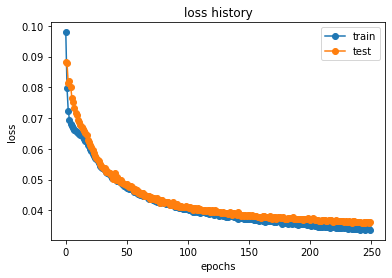

In [15]:
# 学習済み重みの保存
ae.save_weights('autoencoder.h5')
# ネットワークの概要
ae.summary()
# 損失関数値の履歴のプロット
plot_history_loss(records_ae)

### AutoEncoderによる再構成画像の表示

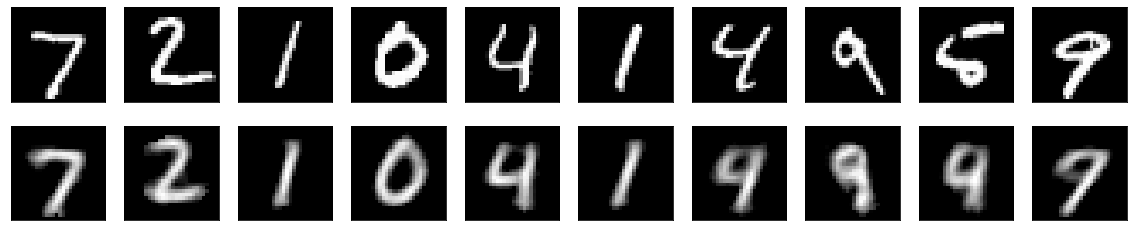

In [9]:
# テスト画像をAutoEncoderで変換
decoded_imgs = ae.predict(X_tst)

n = 10 #表示枚数
plt.figure(figsize=(20, 4))
for i in range(n):
    # 元画像の表示
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_tst[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 再構成画像の表示
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### AutoEncoderの学習結果を用いて深層ニューラルネットを構成（DNN）

In [10]:
# AutoEncoderの学習結果（Encoderの学習済み重み）を取得
h = ae.get_layer('encoder').output
# 最終段にクラス数の分の出力を持つsoftmax関数を追加
y = Dense(n_out, activation='softmax', name='predictions')(h)

# 入力から出力層までを繋ぐNNモデルを生成
dnn = Model(inputs=ae.inputs, outputs=y)

# 損失関数は交差エントロピーを使用． 最近は平均二乗誤差ではなく交差エントロピーが用いられている．
dnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

records_dnn = dnn.fit(X_trn, y_trn,
                epochs=50,
                batch_size=200,
                shuffle=True,
                validation_data=(X_tst, y_tst))

Epoch 1/50
5/5 [==============================] - 0s 37ms/step - loss: 2.2816 - accuracy: 0.0978 - val_loss: 2.1010 - val_accuracy: 0.3380
Epoch 2/50
5/5 [==============================] - 0s 13ms/step - loss: 2.0129 - accuracy: 0.3844 - val_loss: 1.8343 - val_accuracy: 0.5000
Epoch 3/50
5/5 [==============================] - 0s 13ms/step - loss: 1.6706 - accuracy: 0.5434 - val_loss: 1.5201 - val_accuracy: 0.6170
Epoch 4/50
5/5 [==============================] - 0s 13ms/step - loss: 1.3243 - accuracy: 0.6334 - val_loss: 1.2215 - val_accuracy: 0.6750
Epoch 5/50
5/5 [==============================] - 0s 13ms/step - loss: 1.0358 - accuracy: 0.6769 - val_loss: 0.9895 - val_accuracy: 0.6980
Epoch 6/50
5/5 [==============================] - 0s 13ms/step - loss: 0.8282 - accuracy: 0.7295 - val_loss: 0.8237 - val_accuracy: 0.7470
Epoch 7/50
5/5 [==============================] - 0s 13ms/step - loss: 0.6640 - accuracy: 0.7944 - val_loss: 0.7098 - val_accuracy: 0.7930
Epoch 8/50
5/5 [===========

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_input (InputLayer)     [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               125250    
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
encoder (Dense)              (None, 125)               31375     
_________________________________________________________________
predictions (Dense)          (None, 10)                1260  

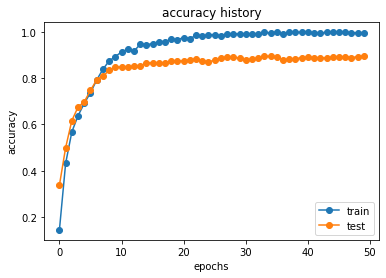

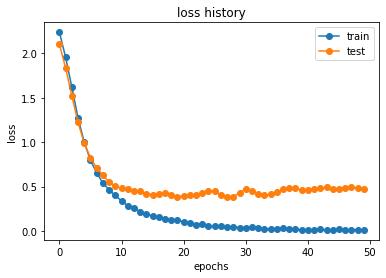

In [11]:
# ネットワークの概要
dnn.summary()
# 学習履歴のプロット
plot_history_acc(records_dnn)
plot_history_loss(records_dnn)

### AutoEncoderを使わない中間層1層の多層パーセプトロン（MLP）

In [12]:
mlp = Sequential()
mlp.add(Dense(500, input_dim = n_dim, activation='sigmoid'))
mlp.add(Dense(n_out, activation='softmax'))
mlp.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics = ['accuracy'])

records_mlp = mlp.fit(X_trn, y_trn,
                epochs=100,
                batch_size=200,
                validation_data=(X_tst, y_tst))

Epoch 1/100
5/5 [==============================] - 0s 33ms/step - loss: 2.3210 - accuracy: 0.2210 - val_loss: 1.9995 - val_accuracy: 0.4330
Epoch 2/100
5/5 [==============================] - 0s 11ms/step - loss: 1.8055 - accuracy: 0.5198 - val_loss: 1.6337 - val_accuracy: 0.6380
Epoch 3/100
5/5 [==============================] - 0s 11ms/step - loss: 1.4474 - accuracy: 0.7497 - val_loss: 1.4058 - val_accuracy: 0.6970
Epoch 4/100
5/5 [==============================] - 0s 11ms/step - loss: 1.1801 - accuracy: 0.8058 - val_loss: 1.2159 - val_accuracy: 0.7200
Epoch 5/100
5/5 [==============================] - 0s 11ms/step - loss: 1.0017 - accuracy: 0.7942 - val_loss: 1.0759 - val_accuracy: 0.7390
Epoch 6/100
5/5 [==============================] - 0s 11ms/step - loss: 0.8367 - accuracy: 0.8310 - val_loss: 0.9787 - val_accuracy: 0.7630
Epoch 7/100
5/5 [==============================] - 0s 12ms/step - loss: 0.7523 - accuracy: 0.8459 - val_loss: 0.9042 - val_accuracy: 0.7700
Epoch 8/100
5/5 [===

In [13]:
# ネットワークの概要
mlp.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5010      
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________


### CNNを実装
- 参考：VGG-likeなconvnet
- https://keras.io/ja/getting-started/sequential-model-guide/

In [14]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

# 2次元の画像として扱うため28x28x1へ変換
X_trn_cnn = X_trn.reshape(X_trn.shape[0], 28, 28, 1)
X_tst_cnn = X_tst.reshape(X_tst.shape[0], 28, 28, 1)

cnn = Sequential()

In [15]:
# Conv2Dで畳み込み層を設定
# kernel_sizeでフィルタのパッチサイズを指定
# Conv2Dの最初の引数は特徴空間の数
cnn.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
cnn.add(Dropout(0.2))
# MaxPooling2Dでプーリング層を設定
# pool_sizeでパッチサイズを指定
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.5))
# もう一段同様に畳み込み層とプーリング層を追加
cnn.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.5))
# Flatten()で2次元の特徴空間を1次元化
cnn.add(Flatten())
# 最後は全結合層を加える
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))
# 出力数がクラス数分の出力層
cnn.add(Dense(len(y_trn[0]), activation='softmax'))

In [16]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

records_cnn = cnn.fit(X_trn_cnn, y_trn,
                   epochs=100,
                   batch_size=200,
                   shuffle=True,
                   validation_data=(X_tst_cnn, y_tst))

Epoch 1/100
5/5 [==============================] - 1s 53ms/step - loss: 2.6358 - accuracy: 0.0950 - val_loss: 2.2666 - val_accuracy: 0.2330
Epoch 2/100
5/5 [==============================] - 0s 28ms/step - loss: 2.3293 - accuracy: 0.1353 - val_loss: 2.2422 - val_accuracy: 0.3750
Epoch 3/100
5/5 [==============================] - 0s 30ms/step - loss: 2.1971 - accuracy: 0.2138 - val_loss: 2.2211 - val_accuracy: 0.4770
Epoch 4/100
5/5 [==============================] - 0s 26ms/step - loss: 2.1400 - accuracy: 0.2604 - val_loss: 2.1902 - val_accuracy: 0.5700
Epoch 5/100
5/5 [==============================] - 0s 26ms/step - loss: 2.0589 - accuracy: 0.2927 - val_loss: 2.1346 - val_accuracy: 0.5990
Epoch 6/100
5/5 [==============================] - 0s 24ms/step - loss: 1.9502 - accuracy: 0.3528 - val_loss: 2.0348 - val_accuracy: 0.6150
Epoch 7/100
5/5 [==============================] - 0s 26ms/step - loss: 1.8367 - accuracy: 0.3812 - val_loss: 1.8882 - val_accuracy: 0.6510
Epoch 8/100
5/5 [===

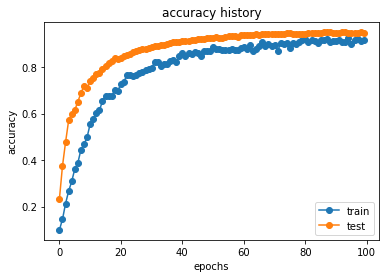

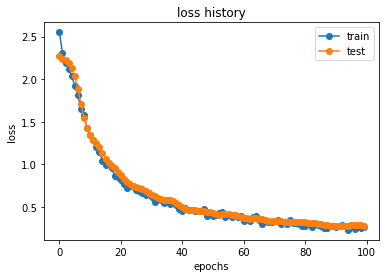

In [17]:
plot_history_acc(records_cnn)
plot_history_loss(records_cnn)

### MLP, DNN, CNNのAccuracyの比較

In [18]:
loss_mlp, acc_mlp = mlp.evaluate(X_tst, y_tst, verbose=0)
loss_dnn, acc_dnn = dnn.evaluate(X_tst, y_tst, verbose=0)
loss_cnn, acc_cnn = cnn.evaluate(X_tst_cnn, y_tst, verbose=0)

print('Test accuracy (MLP):', acc_mlp)
print('Test accuracy (DNN):', acc_dnn)
print('Test accuracy (CNN):', acc_cnn)

Test accuracy (MLP): 0.8479999899864197
Test accuracy (DNN): 0.8939999938011169
Test accuracy (CNN): 0.9470000267028809
